# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Intro to Scikit-Learn

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Explore machine learning techniques, tools and categories
   * Supervised learning
   * Unsupervised learning
   * Classification
   * Regression
   * Clustering
   * Dimensionality reduction
* Review key characterisitcs of Scikit-Learn, especially the application programming interface (API)

# Machine Learning Techniques, Tools and Categories
---

Machine learning falls into two main categories: **supervised learning** and **unsupervised learning**.

## Supervised learning

Supervised learning is the process of modeling the relationship between features of a dataset and targets (labels) associated with each sample of that dataset. With a model in hand, it is possible to use the model to either assign labels to a new dataset that doesn't yet have labels or calculate output values. The most common examples of supervised learning include: **classification** and **regression**.

## Classification

Classification allows you to assign discrete **labels or categories** to new input data.

|Inputs|Classification|
|:---|:---|
|Texts, emails, or comments|Spam detection|
|Flowers, insects, or animals|Species detection|
|Viewers, readers, buyers|Customer detection|

## Regression

Regression analysis allows you to predict **continuous quantities** based on new input data. 

|Inputs|Outputs|
|:---|:---|
|Auto characteristics (color, model, age, etc)|Price|
|Advertising dollars spent|Sales revenue|
|Candidate characteristics|Salary|

## Unsupervised learning

Unsupervised learning is the process of modeling relationships amongst features of a dataset in a way that classifies the raw data without supplying any input labels. There are many algorithms that enable relationships to be identified and each of these models seek to replicate human logic in finding patterns in data. Two of the most common unsupervised learning approaches are **clustering** and **dimensionality reduction**.

## Clustering

Cluster analysis or clustering is a technique for grouping a collection of objects so that all the objects in a single cluster are more similar to each other than to objects in other clusters.

|Inputs|Classification|
|:---|:---|
|Images|Grouping/categorization|
|Marketing data|Customer segmentation|
|Social network data|Community classification|

## Dimensionality reduction

Dimensionality reduction (also dimension reduction) is the process of reducing the number of random variables in a dataset by identifying a set of principal variables. Dimensionality reduction can be used for feature selection or feature extraction.

In some cases, data analysis such as regression or classification can be done in the reduced space more easily and/or accurately than in the original space.

Some benefits from using dimensionality reduction include:

* It reduces the computation time and storage space requirements
* It can enable easier data visualization if the dimensions can be reduced to much lower dimensions like 2D/3D
* It can improve the interpretation of the parameters of a machine learning model
* It helps to avoid issues related to increase in data sparsity as data volume increases ([curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality))

# Key Characteristics of Scikit-Learn
---

Scikit-Learn is a well known package that provides access to many common machine learning algorithms through a consistent, well-organized Application Programming Interface (API) and is supported by very thorough and comprehensive documentation.

The uniform syntax and the consistency in how the API is designed means that once you learn one model, it is surprisingly easy to pick up additional models.

A key goal for this workshop is for you to walk away:

* understanding the API
* with an improved knowledge of the vocabulary of machine learning
* knowing how to learn more

If we succeed in these goals, you will be well-poised to continue your journey and to pursue future studies in the awesomeness that is machine learning.

# The Scikit-Learn API
---

The Scikit-Learn interface follows a number of guidelines covered in the API Contract (as defined in the [**API design paper**](https://arxiv.org/abs/1309.0238)). Quoting from that paper:

> As much as possible, our design choices have been guided so as to avoid the
proliferation of framework code. We try to adopt simple conventions and to
limit to a minimum the number of methods an object must implement. The API
is designed to adhere to the following broad principles:

> **Consistency**. All objects (basic or composite) share a consistent interface composed of a limited set of methods. This interface is documented in a consistent manner for all objects.

> **Inspection**. Constructor parameters and parameter values determined by learning algorithms are stored and exposed as public attributes.

> **Non-proliferation of classes**. Learning algorithms are the only objects to be
represented using custom classes. Datasets are represented as NumPy arrays
or SciPy sparse matrices. Hyper-parameter names and values are represented
as standard Python strings or numbers whenever possible. This keeps scikit-learn easy to use and easy to combine with other libraries.

> **Composition**. Many machine learning tasks are expressible as sequences or
combinations of transformations to data. Some learning algorithms are also
naturally viewed as meta-algorithms parametrized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing
building blocks.

> **Sensible defaults**. Whenever an operation requires a user-defined parameter,
an appropriate default value is defined by the library. The default value
should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand).

For some concrete details on how the API is put together: **[Contributors API Overview](https://scikit-learn.org/stable/developers/contributing.html#api-overview)**

## Using the Scikit-Learn API

By and large, using any given model in Scikit-Learn will follow a set of straightforward steps. Each of our examples will follow what I call **The Process™**.

1. **Prep the data**: the data must be well prepared for it to be usable in the various models. This preparation may include normalization, cleansing, wrangling of the data. It often needs to be separated into a `features` matrix and a `target` vector (array) and/or may need to be broken into separate collections of data for training versus testing purposes.

1. **Choose the model**: to choose a model, we will import the appropriate estimator class

1. **Choose appropriate hyperparameters**: to prepare the model, we create a class instance and provide hyperparameters as arguments to the class

1. **Fit the model**: to fit the model to the existing data, we call the `.fit()` method on the model instance and provide training data

1. **Apply the model**: next, we apply the model to new data, primarily by calling one of two methods:

   * **Supervised learning**: generally, we use the `.predict()` method to predict new labels
   * **Unsupervised learning**: generally, we use either the `.predict()` or `.transform()` methods to predict properties OR transform properties of the data.
   
1. **Examine the results**: lastly, it is recommended that we look over the results and do a sanity check. Some of this can be done by simply looking at output values. Other times it really helps to have some form of data visualization (i.e. graph/chart) to help us examine the model predictions or transformations.

## A quick demo

To whet our appetite for what's to come, we will take a quick look at coffee prices near the North Shore of Oahu, Hawaii. Our goal will be to predict the price of a cup of coffee, given a cup size.

These prices come from several coffee shops in the area, in 2019.

|Size (oz)|Price ($)|
|----|----|
|12|2.95|
|16|3.65|
|20|4.15|
|14|3.25|
|18|4.20|
|20|4.00|


### Prep the data

Let's look at the data in a simple scatter plot to compare the cost of coffee versus the size of the cup.

We start with a set of standard imports...

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.linear_model import LinearRegression

### Prep the training Data

We start off by making two `numpy` arrays.

In [29]:
x_train = np.array([12, 16, 20, 14, 18, 20])             # Coffee sizes
y_train = np.array([2.95, 3.65, 4.15, 3.25, 4.20, 4.00])   # Coffee prices

Then we plot them using a `matplotlib` scatter plot.

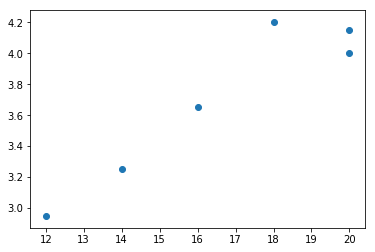

In [30]:
plt.scatter(x_train, y_train);

In order to put this data into a linear regression machine learning algorithm, we need to create our features matrix, which includes just our coffee sizes (`x_train` values).

In this case, we will use one of the `numpy` techniques to increase the dimensionality of the `x_train` array. We will discuss this process in greater detail in a few minutes.
```
X_train = x_train[:, np.newaxis]
```

We will call our training set: `X_train` (with a capital `X`).

In [31]:
X_train = x_train[:, np.newaxis]                           # creates an array of arrays
X_train

array([[12],
       [16],
       [20],
       [14],
       [18],
       [20]])

Our target values are generally labeled `y_train` (lower case) and these values can be a simple array.

In [32]:
y_train

array([2.95, 3.65, 4.15, 3.25, 4.2 , 4.  ])

### Prep the test data

We need to have some test data to see what values the model will predict.

Let's prep several cup sizes to see what price the model will predict.

We start by pulling together a set of `x_test` values (representing size in oz.) and storing them in a matrix for inclusion as an argument when we get to the prediction phase.

In [33]:
x_test = np.array([16, 15, 12, 20, 17])

In [34]:
X_test = x_test[:, None]      # None will accomplish the same
X_test                        # outcome as np.newaxis

array([[16],
       [15],
       [12],
       [20],
       [17]])

### Choose the Model

For this quick example, we are gonna import a simple **linear regression** model from the sklearn collection of linear models.

In [35]:
from sklearn.linear_model import LinearRegression

### Choose Appropriate Hyperparameters

This model comes, as do most of the models in sklearn with arguments (or hyperparameters) set to sane defaults, so for this case, we won't add or change any arguments.

**NOTE**: When Jupyter evaluates a model, it displays a string representation of that model with the current settings for the model, including any defaults.

In [36]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Fit the model

With a prepared model, we need to feed it data to evaluate. For this linear regression model, we give it two arguments: `X` and `y`.

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With these inputs, the model was able to calculate the **slope** (coefficient) and the **y-intercept** of the line that aligns most closely with our training data.

Let's look at both of these calculated results.

```python
model.coef_
model.intercept_
```

**NOTE**: scikit-learn appends an `_` to the end of attributes that return **calculated** values. It does this to help distinguish between inputs and outputs

In [38]:
model.coef_

array([0.148125])

In [39]:
model.intercept_

1.2312499999999993

### Apply the model

In [40]:
y_pred = model.predict(X_test)
y_pred

array([3.60125 , 3.453125, 3.00875 , 4.19375 , 3.749375])

### Examine the Results

From here, we can plot all of the data points together on one chart:

* original values in purple
* predicted values in red
* predicted slope of the line that best fits the original training data

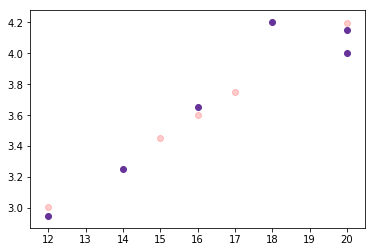

In [41]:
plt.scatter(x_train, y_train, color='rebeccapurple')
plt.scatter(x_test, y_pred, color='red', alpha=0.20)

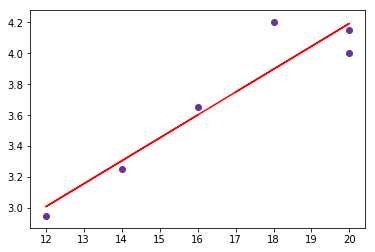

In [42]:
plt.scatter(x_train, y_train, color='rebeccapurple')
plt.plot(x_test, y_pred, color='red');

### Deep Dive

N/A: We will revisit this Linear Regression model in the following lesson and will provide more of a deep dive there.

### Gotchas

N/A

### How to learn more: tips and tricks

As we explore the Scikit-Learn API, and as we progress through the upcoming examples I want to pre-position you for success by showing you where and how you can learn more.

One great resource to better understand the many options available to you in terms of the machine learning algorithms and the hyper parameters in scikit learn is the API Reference.

[API Reference](https://scikit-learn.org/stable/modules/classes.html): A one-stop shop for the classes and functions in `sklearn`

# Experience Points!
---

**Task 01**

* Open the API Reference and find the section on Gaussian Naive Bayes
* Review that section (at a high level) for about 1.5 minutes
* Make notes of any words that you aren't familiar with. See if you hear them later in this tutorial
* Find the link to the User Guide section on Gaussian Naive Bayes and read that article for 1.5 minutes

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API Reference](https://scikit-learn.org/stable/modules/classes.html)|One stop shop for the classes and functions in `sklearn`|
|[Contributors API Overview](https://scikit-learn.org/stable/developers/contributing.html#api-overview)|Overview of the API for contributors to scikit learn|
|[API design contract](https://arxiv.org/abs/1309.0238)|An overview of the philosophy behind the API design|
|[Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis)|An article on regression analysis|
|[Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)|An article on cluster analysis|
|[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)|An article on the curse of dimensionality|